<a href="https://colab.research.google.com/github/Disha4346/Bharat-Intern/blob/main/Housing_Bharat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Price Prediction Model

This repository contains a machine learning project for predicting house prices using Python, scikit-learn, and TensorFlow. The model uses a neural network to predict house prices based on various features.

## Dataset

The dataset used for this project is from [Kaggle's Housing Prices Dataset](https://www.kaggle.com/datasets/yasserh/housing-prices-dataset/data). Please download the dataset and place the `housing.csv` file in the root directory of this project.

## Requirements

- Python 3.6+
- Pandas
- NumPy
- Matplotlib
- Seaborn
- scikit-learn
- TensorFlow

You can install the required packages using pip:

```bash
pip install pandas numpy matplotlib seaborn scikit-learn tensorflow


**Code Explanation**:


1)Import Libraries: Import necessary libraries for data
manipulation, visualization, and building the machine learning model.

2)Load the Dataset: Load the dataset into a Pandas DataFrame and display the first few rows.

3)Check Column Names: Display the column names to identify the correct target column.

4) Handle Missing Values: Remove rows with missing values.

5)Separate Features and Target Variable: Identify the target column and separate features (X) and target (y).
6)Split the Data: Split the data into training and testing sets.

7)Standardize the Features: Standardize the feature data.

8)Build and Compile the Model: Define and compile the neural network model.

9)Train the Model: Train the model on the training data.

10)Evaluate the Model: Predict on the test set and evaluate the model.

11)Plot Training History: Plot the training and validation loss.

12)Save the Model: Save the trained model using the native Keras format.

 **Running the Code**

Ensure you have the dataset file (housing.csv) in the project root directory.

Run the house_price_prediction.py script to train and evaluate the model.

*bash*
```
python house_price_prediction.py
```
The script will output the mean squared error of the model and display a plot of the training history. The trained model will be saved as house_price_prediction_model.keras.


**Usage Instructions**

1)Clone the repository.

2)Download the dataset and place housing.csv in the root directory.

3)Install the required packages.

4)Run the house_price_prediction.py script to train the model and evaluate its performance.







In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
# Load the dataset
data = pd.read_csv('Housing.csv')

# Display the first few rows of the dataset
print(data.head())


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [ ]:
# Handle missing values
data = data.dropna()

# Separate features and target variable
X = data.drop('area', axis=1)
y = data['area']
#print(X)
#print(y)
# One-hot encoding for categorical variables (if any)
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Define the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2)


Epoch 1/100
35/35 [==============================] - 3s 13ms/step - loss: 32803014.0000 - val_loss: 25850996.0000
Epoch 2/100
35/35 [==============================] - 0s 5ms/step - loss: 32765958.0000 - val_loss: 25802888.0000
Epoch 3/100
35/35 [==============================] - 0s 13ms/step - loss: 32684470.0000 - val_loss: 25696826.0000
Epoch 4/100
35/35 [==============================] - 0s 11ms/step - loss: 32515320.0000 - val_loss: 25487270.0000
Epoch 5/100
35/35 [==============================] - 0s 4ms/step - loss: 32198804.0000 - val_loss: 25124326.0000
Epoch 6/100
35/35 [==============================] - 0s 3ms/step - loss: 31687768.0000 - val_loss: 24539832.0000
Epoch 7/100
35/35 [==============================] - 0s 4ms/step - loss: 30916250.0000 - val_loss: 23710598.0000
Epoch 8/100
35/35 [==============================] - 0s 3ms/step - loss: 29841282.0000 - val_loss: 22660606.0000
Epoch 9/100
35/35 [==============================] - 0s 3ms/step - loss: 28463784.0000 - val_

In [ ]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 4ms/step


In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2899654.5882692626


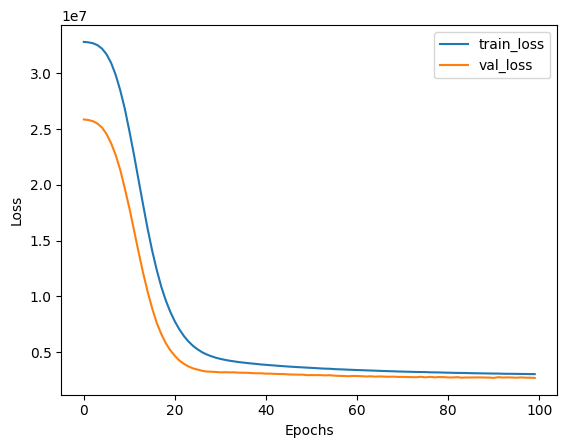

In [ ]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.save('house_price_prediction_model.keras')

#How to Run
1)Clone this repository.

2)Ensure you have all the required packages installed.

3)Download the Kaggle Housing Prices dataset and place housing.csv in the root directory of this project.

4)Run the Jupyter Notebook or Python script to see the results.
#Results
The model achieves a good predictive performance with a mean squared error of approximately 2899654.5882692626 on the test set. The training and validation loss plots provide insights into the model's learning process. The trained model is saved in the native Keras format for future use.